In [1]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [29]:
#dataset = pd.read_csv('EPL_Set.csv')
#dataset
#data  = list(reader(open("EPL_Set.csv",encoding= "utf-8")))
#data

In [3]:
season = dataset['Season'].unique()
len(season)

25

In [4]:
teams = dataset['HomeTeam'].unique()


In [5]:
l=[]
for i in data:
    if i[-1]=='1993-94':
        l.append(i)

In [6]:
table = []
for i in teams:
    mp = 0
    win = 0
    draw = 0
    loss = 0
    Goalscore = 0
    goalsFaced = 0
    goalDif = 0
    points = 0
    for j in l:
        if j[2] == i:
            mp +=1
            if j[-5] == 'H':
                win +=1
            elif j[-5] == 'D':
                draw+=1
            else:
                loss +=1
            Goalscore+=int(j[4])
            goalsFaced+=int(j[5])  
        elif j[3] == i:
            mp +=1
            if j[-5] == 'H':
                loss+=1
            elif j[-5] == 'D':
                draw+=1
            else:
                win+=1
            Goalscore+=int(j[5])
            goalsFaced+=int(j[4])
    gd = Goalscore-goalsFaced
    points = (win*3)+draw
    if mp !=  0:
        table.append([i,mp,win,draw,loss,Goalscore,goalsFaced,gd,points])

In [7]:
pd.DataFrame(teams)
teams_man = teams[teams == 'Man United']

In [30]:
#table

In [9]:
season = dataset['Season'].unique()

In [10]:
def seasons_data(season):
    season_table = []
    for i in teams: # teams is a list where all team names stored.
        mp = 0
        win = 0
        draw = 0
        loss=0
        goal_scored=0
        goal_faced=0
        goal_difference=0
        points=0
        Season_Name = season
        for j in data:
            if j[-1] == season: # j[-1] is Seasons column in dataset
                
                if j[2] == i: # j[2] is HomeTeam column in dataset
                    mp +=1
                    if j[-5] =='H': # j[-5] is FulltimeResult column in dataset
                        win+=1
                    elif j[-5] == 'D': # j[-5] is FulltimeResult column in dataset
                        draw+=1
                    else:
                        loss+=1
                    goal_scored+=int(j[4]) # j[4] is FulltimeHomeGoal column in dataset
                    goal_faced+=int(j[5]) # j[5] is FulltimeAwayGoal column in dataset
                elif j[3]==i: # j[3] is AwayTeam column in dataset
                    mp +=1
                    if j[-5] =='H': # j[-5] is FulltimeResult column in dataset
                        loss+=1
                    elif j[-5] == 'D': # j[-5] is FulltimeResult column in dataset
                        draw+=1
                    else:
                        win+=1
                    goal_scored+=int(j[5]) # j[5] is FulltimeAwayGoal column in dataset
                    goal_faced+=int(j[4]) # j[4] is FulltimeHomeGoal column in dataset
        gd = goal_scored-goal_faced
        points = (win*3)+draw
        if mp !=0:
            season_table.append([i,mp,win,draw,loss,goal_scored,goal_faced,gd,points,season])
            def rows(row):
                return row[-2]
            season_table = sorted(season_table, reverse = True, key = rows)
            #table = pd.DataFrame(season_table, columns=["Teams","MP","W","D","L","GF","GA","GD","PTS"])
            #table.to_excel(f"EPL Season {season}.xlsx",index=False)  ## To Export dataset into excel file
    return season_table

In [31]:
#seasons_data('1993-94')

In [12]:
a = []
for i in season:
    s = seasons_data(i)[0]
    a.append(s)

In [13]:
df = pd.DataFrame(a)
df

,0,1,2,3,4,5,6,7,8,9
0,Man United,42,27,11,4,80,38,42,92,1993-94
1,Blackburn,42,27,8,7,80,39,41,89,1994-95
2,Man United,38,25,7,6,73,35,38,82,1995-96
3,Man United,38,21,12,5,76,44,32,75,1996-97
4,Arsenal,38,23,9,6,68,33,35,78,1997-98
5,Man United,38,22,13,3,80,37,43,79,1998-99
6,Man United,38,28,7,3,97,45,52,91,1999-00
7,Man United,38,24,8,6,79,31,48,80,2000-01
8,Arsenal,38,26,9,3,79,36,43,87,2001-02
9,Man United,38,25,8,5,74,34,40,83,2002-03


In [14]:
df = df[df[0] == 'Man United']

In [15]:
df = df.tail(12).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9
0,Man United,42,27,11,4,80,38,42,92,1993-94
1,Man United,38,25,7,6,73,35,38,82,1995-96
2,Man United,38,21,12,5,76,44,32,75,1996-97
3,Man United,38,22,13,3,80,37,43,79,1998-99
4,Man United,38,28,7,3,97,45,52,91,1999-00
5,Man United,38,24,8,6,79,31,48,80,2000-01
6,Man United,38,25,8,5,74,34,40,83,2002-03
7,Man United,38,28,5,5,83,27,56,89,2006-07
8,Man United,38,27,6,5,80,22,58,87,2007-08
9,Man United,38,28,6,4,68,24,44,90,2008-09


In [16]:
complete_table = []
for i in season:
    s= pd.DataFrame(seasons_data(i)).reset_index()
    s['index']=s['index']+1
    s = s[s[0] == "Man United"].iloc[0].values
    complete_table.append(s)
    Man_unit =pd.DataFrame( complete_table, columns=['Rank', 'Team', 'MP','W','D','L','GF','GA','GD','PTS','Season'])

In [17]:
year_12 = complete_table[-12:]
year_12

[array([1, 'Man United', 38, 28, 5, 5, 83, 27, 56, 89, '2006-07'],
       dtype=object),
 array([1, 'Man United', 38, 27, 6, 5, 80, 22, 58, 87, '2007-08'],
       dtype=object),
 array([1, 'Man United', 38, 28, 6, 4, 68, 24, 44, 90, '2008-09'],
       dtype=object),
 array([2, 'Man United', 38, 27, 4, 7, 86, 28, 58, 85, '2009-10'],
       dtype=object),
 array([1, 'Man United', 38, 23, 11, 4, 78, 37, 41, 80, '2010-11'],
       dtype=object),
 array([2, 'Man United', 38, 28, 5, 5, 89, 33, 56, 89, '2011-12'],
       dtype=object),
 array([1, 'Man United', 38, 28, 5, 5, 86, 43, 43, 89, '2012-13'],
       dtype=object),
 array([7, 'Man United', 38, 19, 7, 12, 64, 43, 21, 64, '2013-14'],
       dtype=object),
 array([4, 'Man United', 38, 20, 10, 8, 62, 37, 25, 70, '2014-15'],
       dtype=object),
 array([5, 'Man United', 38, 19, 9, 10, 49, 35, 14, 66, '2015-16'],
       dtype=object),
 array([6, 'Man United', 38, 18, 15, 5, 54, 29, 25, 69, '2016-17'],
       dtype=object),
 array([2, 'Man 

In [18]:
last_12 = Man_unit[-12:]
last_12 = last_12.reset_index(drop=True)

In [19]:
man_2010 = Man_unit.iloc[16]
man_2010 = man_2010.reset_index(drop=True)

In [20]:
man_2010

0              2
1     Man United
2             38
3             27
4              4
5              7
6             86
7             28
8             58
9             85
10       2009-10
Name: 16, dtype: object

In [21]:
last_12

,Rank,Team,MP,W,D,L,GF,GA,GD,PTS,Season
0,1,Man United,38,28,5,5,83,27,56,89,2006-07
1,1,Man United,38,27,6,5,80,22,58,87,2007-08
2,1,Man United,38,28,6,4,68,24,44,90,2008-09
3,2,Man United,38,27,4,7,86,28,58,85,2009-10
4,1,Man United,38,23,11,4,78,37,41,80,2010-11
5,2,Man United,38,28,5,5,89,33,56,89,2011-12
6,1,Man United,38,28,5,5,86,43,43,89,2012-13
7,7,Man United,38,19,7,12,64,43,21,64,2013-14
8,4,Man United,38,20,10,8,62,37,25,70,2014-15
9,5,Man United,38,19,9,10,49,35,14,66,2015-16


In [22]:
Man_unit

,Rank,Team,MP,W,D,L,GF,GA,GD,PTS,Season
0,1,Man United,42,27,11,4,80,38,42,92,1993-94
1,2,Man United,42,26,10,6,77,28,49,88,1994-95
2,1,Man United,38,25,7,6,73,35,38,82,1995-96
3,1,Man United,38,21,12,5,76,44,32,75,1996-97
4,2,Man United,38,23,8,7,73,26,47,77,1997-98
5,1,Man United,38,22,13,3,80,37,43,79,1998-99
6,1,Man United,38,28,7,3,97,45,52,91,1999-00
7,1,Man United,38,24,8,6,79,31,48,80,2000-01
8,3,Man United,38,24,5,9,87,45,42,77,2001-02
9,1,Man United,38,25,8,5,74,34,40,83,2002-03


In [23]:
man_2010_11 = Man_unit[Man_unit['Season'] == '2010-11']

In [24]:
man_2010_11 = man_2010_11.reset_index(drop = True)

In [25]:
def category(x):
    if pd.isnull(x):
        return "None"
    elif 0 < x <= 1:
        return "green"
    elif 1 < x <= 4:
        return "purple"
    elif 5 < x <= 10:
        return "red"
    elif x == 5:
        return "orange"

In [26]:
color = []
for i in last_12['Rank']:
    category(i)
    print(category(i))
    color.append(category(i))

green
green
green
purple
green
purple
green
red
purple
orange
red
purple


In [27]:
colors = ["green", "purple", "red", "orange"]

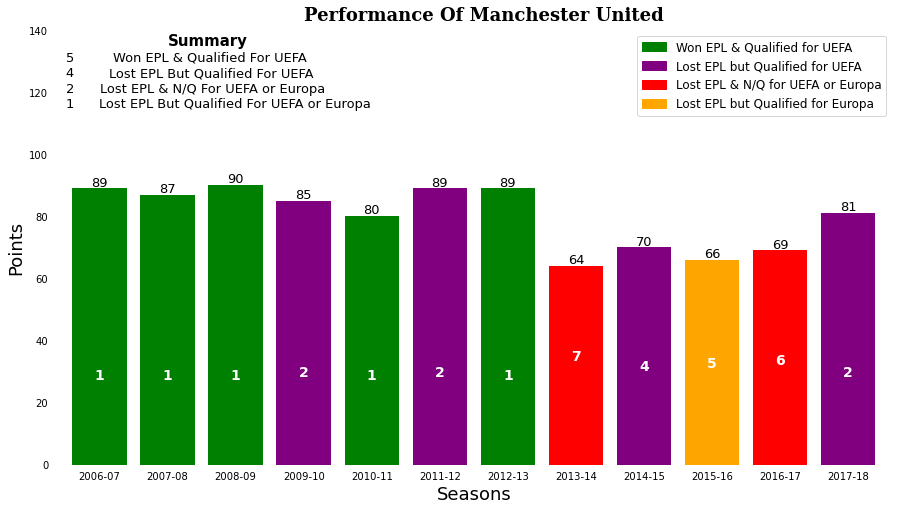

In [28]:
last_12.plot(x='Season', y='PTS', kind='bar', figsize=(15,8),alpha = 1\
                    ,color = color \
                    , width = 0.8)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+4,y[i],ha = "center", va='top', size=13)
addlabels(last_12["Season"],last_12["PTS"])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+30,y[i],ha = "center", va='top', size=14,color='white',fontweight="bold")
addlabels(last_12["Season"],last_12["Rank"])

plt.xticks(rotation = 360)
plt.yticks(range(0,150,20))
plt.xlabel('Seasons', size = 18)
plt.ylabel('Points', size = 18)
plt.tick_params(bottom = 0, left = 0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.text(3, 143, "Performance Of Manchester United", size = 18, weight = "bold", fontname='Serif')
plt.text(1, 135, "Summary", size = 15, weight = "bold")
plt.text(0.2, 130, "Won EPL & Qualified For UEFA", size = 13)
plt.text(-0.5, 130, "5", size = 13)
plt.text(0.14, 125, "Lost EPL But Qualified For UEFA", size = 13)
plt.text(-0.5, 125, "4", size = 13)
plt.text(0, 120, "Lost EPL & N/Q For UEFA or Europa", size = 13)
plt.text(-0.5, 120, "2", size = 13)
plt.text(-0.001, 115, "Lost EPL But Qualified For UEFA or Europa", size = 13)
plt.text(-0.5, 115, "1", size = 13)


labels = ["Won EPL & Qualified for UEFA","Lost EPL but Qualified for UEFA"\
          ,"Lost EPL & N/Q for UEFA or Europa","Lost EPL but Qualified for Europa"]
colors = colors


patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, labels)]

plt.legend(handles=patches, loc="upper right", fontsize=12)

plt.show()